PREGUNTAS ⁉️ / ANALISIS DE DATOS 📊
- 5. ¿Cual es la aparicion mas antigua y mas nueva , en que lugar nacio es superheroe y cual es su Alias?
  6. ¿Cuantos superheroes buenos y malos existen? ¿Cual es la correlacion entre la aliniacion del superheroe y el editor?
     ¿Que editor tiene mas superheroes buenos y/o malos?

In [1]:
import numpy as np
import pandas as pd
import re
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.patches import Patch 
import seaborn as sns


df = pd.read_csv("heroes_completo_limpio.csv") 

def limpiar_y_extraer_año(df: pd.DataFrame) -> pd.DataFrame:
    def extraer_año(texto):
        if pd.isna(texto) or texto == "Sin dato":
            return np.nan
        # Busca el primer patrón de 4 dígitos que se parezca a un año (por ejemplo: 19XX o 20XX)
        coincidencia = re.search(r'\b(19\d{2}|20\d{2})\b', str(texto))
        return int(coincidencia.group(1)) if coincidencia else np.nan

    df['Año_Aparicion'] = df['Primera aparición'].apply(extraer_año)
    return df


df_limpio = limpiar_y_extraer_año(df.copy())
df_limpio.replace('Sin dato', np.nan, inplace=True) # Reemplazar 'Sin dato' por NaN

def obtener_aparicion_antigua_y_nueva(df: pd.DataFrame) -> tuple:

    df_años_validos = df.dropna(subset=['Año_Aparicion'])
    
    # Heroe con la aparición más antigua (min)
    indice_antiguo = df_años_validos['Año_Aparicion'].idxmin()
    heroe_antiguo = df_años_validos.loc[indice_antiguo]
    
    # Heroe con la aparición más nueva (max)
    indice_nuevo = df_años_validos['Año_Aparicion'].idxmax()
    heroe_nuevo = df_años_validos.loc[indice_nuevo]
    
    claves = ['Nombre', 'Primera aparición', 'Lugar de nacimiento', 'Alias', 'Año_Aparicion']
    info_antigua = heroe_antiguo[claves].to_dict()
    info_nueva = heroe_nuevo[claves].to_dict()
    
    return info_antigua, info_nueva

In [2]:
info_antigua, info_nueva = obtener_aparicion_antigua_y_nueva(df_limpio)
df_info_5 = pd.DataFrame({
    "MAS ANTIGUO": info_antigua,
    "MAS NUEVO": info_nueva
})
print(" - - SuperHeroe mas antiguo y mas nuevo - - ")
df_info_5

 - - SuperHeroe mas antiguo y mas nuevo - - 


,MAS ANTIGUO,MAS NUEVO
Nombre,King Kong,Bloodhawk
Primera aparición,King Kong (1933),X-Men (2099) #1
Lugar de nacimiento,Skull Island,-
Alias,"the 8th Wonder of the World, King of Skull Island",Lemuel Halcon
Año_Aparicion,1933.0,2099.0


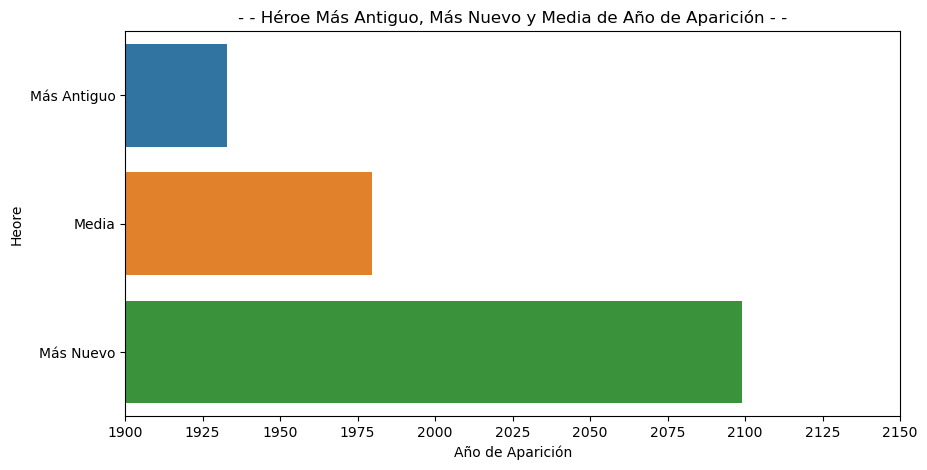

In [3]:
media_aparicion = df_limpio["Año_Aparicion"].mean()

df_grafico = pd.DataFrame({
    "Héroe": ["Más Antiguo", "Media", "Más Nuevo"],
    "Año_Aparicion": [
        info_antigua["Año_Aparicion"],
        media_aparicion,
        info_nueva["Año_Aparicion"]],
    "Nombre": [
        info_antigua["Nombre"],
        "Media General",
        info_nueva["Nombre"]]})



plt.figure(figsize=(10, 5))

sns.barplot(
    x="Año_Aparicion",
    y="Héroe",
    hue="Héroe",
    data=df_grafico,)

plt.title("- - Héroe Más Antiguo, Más Nuevo y Media de Año de Aparición - -")
plt.xlabel("Año de Aparición")
plt.ylabel("Heore")
plt.xlim(1900, 2150)
plt.xticks(range(1900, 2151, 25))

plt.show()

In [4]:
def contar_alineacion_por_editor(df: pd.DataFrame) -> pd.DataFrame:

    df['Alineación'] = df['Alineación'].replace({np.nan: 'Sin dato', '-': 'Sin dato'})
    
    tabla_conteo = pd.crosstab(df['Editor'], df['Alineación'], dropna=False)
    
    tabla_conteo['Total'] = tabla_conteo.sum(axis=1)
    
    orden_columnas = ['good', 'bad', 'neutral', 'Sin dato', 'Total']
    for col in orden_columnas:
        if col not in tabla_conteo.columns:
            tabla_conteo[col] = 0
            
    return tabla_conteo[orden_columnas]
    
    #crea una tabla con conteos y totales de alineación por editor

def obtener_resumen_alineacion(df_conteo: pd.DataFrame) -> tuple:
    
    total_buenos = df_conteo['good'].sum()
    total_malos = df_conteo['bad'].sum()
    
    # Editor con más 'good'
    editor_mas_buenos = df_conteo['good'].idxmax()
    
    # Editor con más 'bad'
    editor_mas_malos = df_conteo['bad'].idxmax()
    
    return total_buenos, total_malos, editor_mas_buenos, editor_mas_malos
    
    #resume los conteos totales y determina qué editor tiene más personajes buenos y malos


In [5]:
tabla_alineacion = contar_alineacion_por_editor(df_limpio)
total_buenos, total_malos, editor_mas_buenos, editor_mas_malos = obtener_resumen_alineacion(tabla_alineacion)
df_info_6 = pd.DataFrame({
    "SUPERHEROES": ["Total buenos", "Total malos", "TOTAL"],
    "CANTIDAD": [total_buenos, total_malos, total_buenos + total_malos]
})

print(" ## ¿Cuantos superheroes buenos y malos existen y el TOTAL? ##")

df_info_6


 ## ¿Cuantos superheroes buenos y malos existen y el TOTAL? ##


,SUPERHEROES,CANTIDAD
0,Total buenos,494
1,Total malos,206
2,TOTAL,700


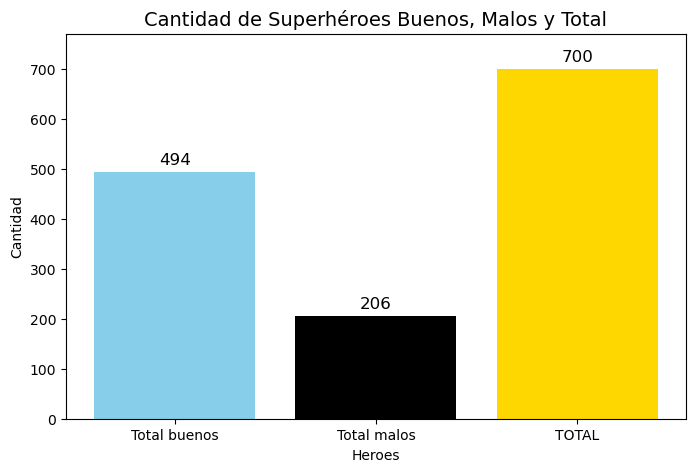

In [6]:
colores = ["skyblue", "black", "gold"] 
plt.figure(figsize=(8,5))
bars = plt.bar(df_info_6["SUPERHEROES"], df_info_6["CANTIDAD"], color=colores)

for bar in bars:
    altura = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, altura + 0.02*df_info_6["CANTIDAD"].max(),
             int(altura), ha='center', fontsize=12)

plt.title("Cantidad de Superhéroes Buenos, Malos y Total", fontsize=14)
plt.ylabel("Cantidad")
plt.xlabel("Heroes")
plt.ylim(0, df_info_6["CANTIDAD"].max() * 1.1)

plt.show()



In [7]:
tabla_alineacion = contar_alineacion_por_editor(df_limpio)
total_buenos, total_malos, editor_mas_buenos, editor_mas_malos = obtener_resumen_alineacion(tabla_alineacion)

df_info_61 = pd.DataFrame({
    "EDITOR CON MAS BUENOS Y MALOS": ["Editor con más buenos", "Editor con más malos"],
    "EDITOR": [editor_mas_buenos, editor_mas_malos]
})
print(" ## ¿Que editor tiene mas superheroes buenos y/o malos?  ##")
print(" ## EL EDITOR CON MAS MALOS Y BUENOS ES ➡️MARVEL COMICS⬅️ ##")
df_info_61

 ## ¿Que editor tiene mas superheroes buenos y/o malos?  ##
 ## EL EDITOR CON MAS MALOS Y BUENOS ES ➡️MARVEL COMICS⬅️ ##


,EDITOR CON MAS BUENOS Y MALOS,EDITOR
0,Editor con más buenos,Marvel Comics
1,Editor con más malos,Marvel Comics


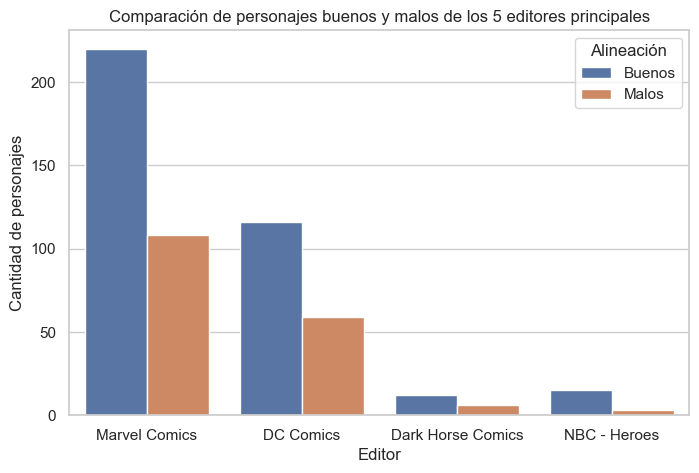

In [8]:
tabla_alineacion = contar_alineacion_por_editor(df_limpio)

#tomamos los 5 editores con mas personajes
top5_editores = tabla_alineacion.sort_values('Total', ascending=False).head(5)

#representamos los valores en cada fila con un solo valor 
df_plot = top5_editores[['good', 'bad']].reset_index().melt(
    id_vars='Editor', value_vars=['good', 'bad'],
    var_name='Alineación',
    value_name='Cantidad'
)

# Reemplazamos los valores 'good' y 'bad'
df_plot['Alineación'] = df_plot['Alineación'].replace({'good': 'Buenos', 'bad': 'Malos'})

sns.set(style="whitegrid")
plt.figure(figsize=(8,5))

barplot = sns.barplot(
    x='Editor',
    y='Cantidad',
    hue='Alineación',
    data=df_plot,
)

plt.title("Comparación de personajes buenos y malos de los 5 editores principales")
plt.ylabel("Cantidad de personajes")
plt.xlabel("Editor")
plt.legend(title="Alineación")
plt.show()



In [9]:
#correlacion de los 5 mas importantes
df_correlacion = df_limpio.dropna(subset=['Alineación', 'Editor']) #limpiamos para que no tengan datos vacios

conteo_editores = df_correlacion['Editor'].value_counts() # contamos cuantas veces aparecen los editores

top5_editores = conteo_editores.head(5).index.tolist() #tomamos los 5 mejores editores con mas registreos

tabla_contingencia = pd.crosstab(df_correlacion['Editor'], df_correlacion['Alineación']) #Crea una tabla de contingencia  que muestra la frecuencia de cada combinación

tabla_porcentajes = tabla_contingencia.div(tabla_contingencia.sum(axis=1), axis=0) * 100 #calculamos el porcentaje por fila

df_editor_alineacion = tabla_contingencia.astype(str) + " (" + tabla_porcentajes.round(1).astype(str) + "%)" #Combinamos conteo y porcentaje en un solo string

df_top5_alineacion = df_editor_alineacion.loc[top5_editores] # selecionamos 5
print("Correlacion de los 5 mas importantes🏆")
print("Segun la correlacion hecha se ve claramente que Marvel, DC Comics y Dark Horse Comics tienen ")
df_top5_alineacion



Correlacion de los 5 mas importantes🏆
Segun la correlacion hecha se ve claramente que Marvel, DC Comics y Dark Horse Comics tienen 


Alineación,Sin dato,bad,good,neutral
Editor,,,,
Marvel Comics,1 (0.3%),108 (31.9%),220 (64.9%),10 (2.9%)
DC Comics,1 (0.5%),59 (31.4%),116 (61.7%),12 (6.4%)
Dark Horse Comics,0 (0.0%),6 (33.3%),12 (66.7%),0 (0.0%)
NBC - Heroes,0 (0.0%),3 (16.7%),15 (83.3%),0 (0.0%)
Image Comics,1 (7.1%),11 (78.6%),2 (14.3%),0 (0.0%)


C:\Users\Nitropc\AppData\Local\Temp\ipykernel_17176\773947467.py:25: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\Nitropc\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


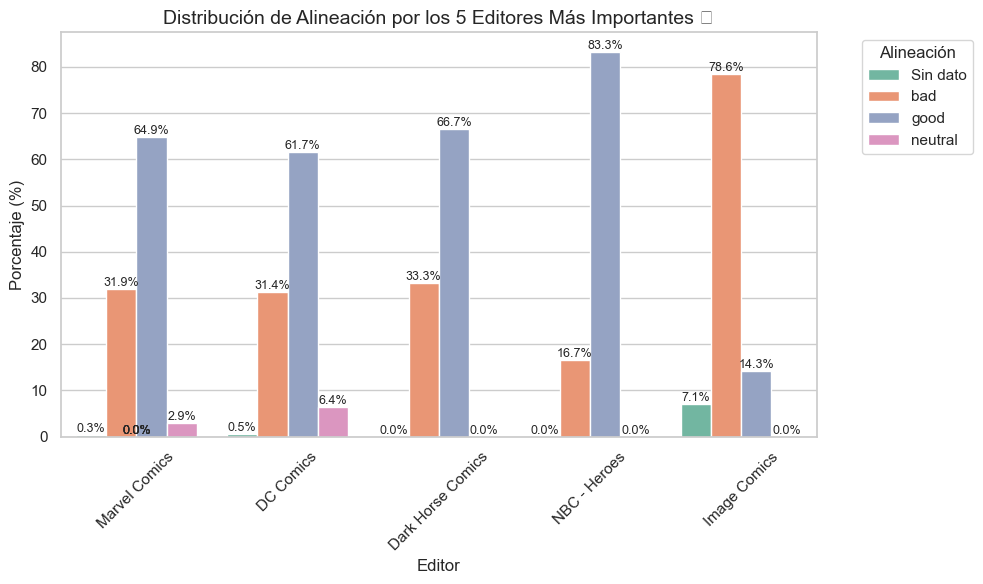

In [10]:
tabla_porcentajes_top5 = tabla_porcentajes.loc[top5_editores]
df_plot = tabla_porcentajes_top5.reset_index().melt(
    id_vars='Editor',
    var_name='Alineación',
    value_name='Porcentaje'
)

sns.set(style="whitegrid")

plt.figure(figsize=(10,6))
ax = sns.barplot(data=df_plot, x='Editor', y='Porcentaje', hue='Alineación', palette='Set2')


for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.1f}%', 
                (p.get_x() + p.get_width() / 2., height), 
                ha='center', va='bottom', fontsize=9, rotation=0)

plt.title('Distribución de Alineación por los 5 Editores Más Importantes 🏆', fontsize=14)
plt.ylabel('Porcentaje (%)')
plt.xlabel('Editor')
plt.legend(title='Alineación', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

